In [14]:
# Mount your own google drive to Colab
from google.colab import drive
drive.mount('/content/drive')
import sys
# Change the path below to the path where your folder locates
sys.path.append('/content/drive/My Drive/CS/CSM146/')

Mounted at /content/drive


In [52]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).

# python libraries
import os

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

import time 

In [16]:
######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [81]:
class PolynomialRegression() :
    
    def __init__(self, m=1) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        # part g: modify to create matrix for polynomial model
        m = self.m_

        Phi = np.ones((n, m+1))
        for i in range(1, m+1):
          Phi[:, i] = X[:, 0]**i
        
        ### ========== TODO : END ========== ###
        
        return Phi
    
    
    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        
        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1/(1+t+1)
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###
                
            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            self.coef_ = self.coef_ - 2 * eta * (np.dot((np.dot(X.T, X)), self.coef_) - np.dot(X.T, y))
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(X, self.coef_) # change this line
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)                
            ### ========== TODO : END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        
        print('number of iterations: %d'%(t+1))
        
        return self
    
    
    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
                
        Returns
        --------------------        
            self    -- an instance of self
        """
        
        X = self.generate_polynomial_features(X) # map features
        start = time.time()
        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        # self.coef_ = ((np.linalg.pinv(np.dot(X.T, X))).dot(X.T)).dot(y)

        # a = np.linalg.pinv(np.dot(X.transpose(), X))
        # b = np.dot(X.transpose(), y)
        # self.coef_ = np.dot(a, b)
        self.coef_ = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)),X.T),y)
        # print("Elapsed time: {:.3f} seconds".format(time.time() - start))
  
        ### ========== TODO : END ========== ###
    
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(X, self.coef_)
        ### ========== TODO : END ========== ###
        
        return y
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        cost = np.sum(np.square(self.predict(X)-y))
        ### ========== TODO : END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        n,d = X.shape
        error = np.sqrt(self.cost(X,y)/n)
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()

Investigating polynomial regression...
0.7472683641851717
0.5935949636028289
0.5957110445316882
0.37194297617203903
0.36393172002184554
0.3551377428803351
0.36745016928700935
0.42500831457079924
0.40566865244399714
1.482441015631645
2.0078547606705337


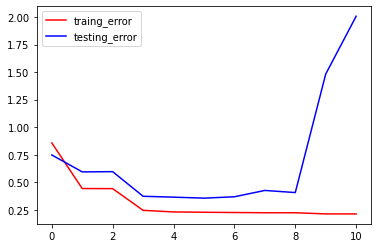

Done!


In [84]:
######################################################################
# main
######################################################################

def main() :
    # load data
    # Use the abs path on your own Google Drive
    train_data = load_data("/content/drive/My Drive/CS/CSM146/regression_train.csv")
    test_data = load_data("/content/drive/My Drive/CS/CSM146/regression_test.csv")

  

    # print(train_data.X.shape, train_data.y.shape)
    # print(test_data.X.shape, test_data.y.shape)
    
    X = train_data.X
    y = train_data.y
    n,d = X.shape  # n = number of examples, d =  number of features
    
    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    # print('Visualizing data...')
    # plot_data(X, y)
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    # print('Investigating linear regression...')
    # model = PolynomialRegression()
    # eta = [.0001,.001,.01,.1]
    # for e in eta:
    #   start = time.time()
    #   print('Eta:', e)
    #   model.fit_GD(X, y, eta=e)
    #   print(model.coef_)
    #   print(model.cost(X,y))
    #   print("GD time: {:.3f} seconds".format(time.time() - start))
    # print('Variable eta')
    # model.fit_GD(X, y)
    # print(model.cost(X,y))
    # print('Closed form solution')
    # model.fit(X,y)
    # print(model.coef_)
    # print(model.cost(X,y))

    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('Investigating polynomial regression...')
    training_error = list()
    testing_error = list()
    for i in range(11):
        model = PolynomialRegression(m=i)
        model.fit(train_data.X, train_data.y)
        training_error.append(model.rms_error(train_data.X, train_data.y))
        testing_error.append(model.rms_error(test_data.X, test_data.y))
        print(model.rms_error(test_data.X, test_data.y))
    a = [i for i in range(11)]
    fig, ax = plt.subplots()
    ax.plot(a, training_error, "r", label="traing_error")
    ax.plot(a, testing_error, "b", label="testing_error")
    plt.legend()
    plt.show()

    ### ========== TODO : END ========== ###
    
    
    
    
    print("Done!")

if __name__ == "__main__":
    main()
